<a href="https://colab.research.google.com/github/dsibi/yandex_praktikum_da/blob/main/02_analyze_ab_test_results/02_analyze_ab_test_results.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Принятие решений в бизнесе на основе данных**

---

## Описание проекта

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.

Проект будет состоять из 2 частей:
*  1 часть - приоритизация гипотез;
*  2 часть - запуск A/B-теста и анализ результатов.

#Часть 1. Приоритизация гипотез

---



##Описание данных

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort:
* Hypothesis — краткое описание гипотезы;
* Reach — охват пользователей по 10-балльной шкале;
* Impact — влияние на пользователей по 10-балльной шкале;
* Confidence — уверенность в гипотезе по 10-балльной шкале;
* Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале.

Импортируем все необходимые нам библиотеки, далее новые библиотеки будем добавлять сюда же

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from scipy import stats as st
import math

Установим безлимитную ширину колонки при выводе, чтобы названия гипотез выводились полностью.

In [2]:
pd.set_option('display.max_colwidth', 1000)

##1.1. Загрузим данные и подготовим их к анализу

---



###1.1.1. Загрузим файлы с данными и изучим общую информацию

Чтение файлов

In [3]:
# hypothesis=pd.read_csv('/datasets/hypothesis.csv')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Чтение файлов

In [5]:
hypothesis=pd.read_csv('/content/drive/MyDrive/Edu/Data Analysis/8_Принятие решений в бизнесе на основе данных/!Project/data/hypothesis.csv')

Изучим общую информацию 

In [6]:
df_list = [hypothesis]
for df in df_list:   
    print('Первые 5 строк датафрейма')
    print('-'*80)
    display(df.head(5))
    print('-'*80)
    print('Типы данных и общая информация')
    print(df.info())
    print('-'*80)
    print('Наличие дубликатов: {}'.format(df.duplicated().sum()))
    print('-'*80)
    print('Наличие пропусков')
    print('-'*80)
    print(df.isna().sum())
    print('Стат данные')
    print('-'*80)
    display(df.describe())

Первые 5 строк датафрейма
--------------------------------------------------------------------------------


,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


--------------------------------------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes
None
--------------------------------------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------------------------------------
Наличие пропусков
--------------------------------------------------------------------------------
Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64
Стат данные
------------------------------------------------------------

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


1. Названия столбцов: необходимо скорректировать регистр названий всех колонок.
2. Типы данных: корректировка не требуется.
3. Дубликаты: отсутствуют.
4. Пропуски: отсутствуют.
5. Аномалии в данных: отсутствуют.

###1.1.2. Подготовим данные к анализу

In [7]:
hypothesis.columns= hypothesis.columns.str.lower()

##1.2. Применим фреймворк ICE для приоритизации гипотез и отсортируем их по убыванию приоритета

---



In [8]:
hypothesis['ice'] = ((hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).round(1)
display(hypothesis[['hypothesis','ice']].sort_values(by='ice', ascending=False))

,hypothesis,ice
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


##1.3. Применим фреймворк RICE для приоритизации гипотез и отсортируем их по убыванию приоритета

---



In [9]:
hypothesis['rice'] = ((hypothesis['reach']*hypothesis['impact']*hypothesis['confidence'])/hypothesis['efforts']).round(1)
display(hypothesis[['hypothesis','rice']].sort_values(by='rice', ascending=False))

,hypothesis,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


##1.4. Отметим различие в приоритизации гипотез при разных методах

---



In [10]:
sns.set_theme()

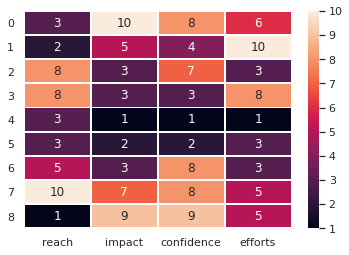

In [11]:
ax = sns.heatmap(hypothesis[['reach',	'impact',	'confidence',	'efforts']], annot=True, linewidths=1, linecolor='white')
plt.yticks(rotation=0);

При применении фреймворка ICE наиболее перспективными гипотезами являются - 8, 0 и 7, однако с учетом параметра охвата пользователей (Reach) наиболее перспективными гипотезами являются - 7, 2 и 0.

Так получилось, потому, что у гипотезы 7 максимальная оценка Reach, следом за ней идут гипотезы 2 и 3 с оценкой 8, но т.к. у гипотезы 3 высокий Efforts, это снижает ее общую оценку в приоритизации, при этом гипотеза 0 вышла в топ-3 по причине максимально оцененного Impact и высокого Confidence.

В связи с вышеизложенным рекомендовано в первую очередь проводить тестирование гипотез 7 и 0.

#Часть 2. Запуск A/B-теста и анализ результатов
---



##Описание данных

Мы провели A/B-тест и получили результаты.

Файл /datasets/orders.csv:
* transactionId — идентификатор заказа;
* visitorId — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv:
* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

Проанализируем A/B-тест.

##2.1. Загрузим данные и подготовим их к анализу

---



###2.1.1. Загрузим файлы с данными и изучим общую информацию

Чтение файлов

In [12]:
# orders=pd.read_csv('/datasets/orders.csv')
# visitors=pd.read_csv('/datasets/visitors.csv')

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Чтение файлов

In [14]:
orders=pd.read_csv('/content/drive/MyDrive/Edu/Data Analysis/8_Принятие решений в бизнесе на основе данных/!Project/data/orders.csv')
visitors=pd.read_csv('/content/drive/MyDrive/Edu/Data Analysis/8_Принятие решений в бизнесе на основе данных/!Project/data/visitors.csv')

Изучим общую информацию 

In [15]:
df_list = [orders, visitors]
for df in df_list:   
    print('Первые 5 строк датафрейма')
    print('-'*80)
    display(df.head(5))
    print('-'*80)
    print('Типы данных и общая информация')
    print(df.info())
    print('-'*80)
    print('Наличие дубликатов: {}'.format(df.duplicated().sum()))
    print('-'*80)
    print('Наличие пропусков')
    print('-'*80)
    print(df.isna().sum())
    print('Стат данные')
    print('-'*80)
    display(df.describe())

Первые 5 строк датафрейма
--------------------------------------------------------------------------------


,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


--------------------------------------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
--------------------------------------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------------------------------------
Наличие пропусков
--------------------------------------------------------------------------------
transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
Стат данные
----------------------

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


Первые 5 строк датафрейма
--------------------------------------------------------------------------------


,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


--------------------------------------------------------------------------------
Типы данных и общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None
--------------------------------------------------------------------------------
Наличие дубликатов: 0
--------------------------------------------------------------------------------
Наличие пропусков
--------------------------------------------------------------------------------
date        0
group       0
visitors    0
dtype: int64
Стат данные
--------------------------------------------------------------------------------


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


1. Названия столбцов: необходимо скорректировать названия колонок:
orders: transactionId и visitorId.
2. Типы данных:
orders и visitors: перевести в формат даты колонку date.
3. Дубликаты: отсутствуют.
4. Пропуски: отсутствуют.
5. Аномалии в данных: отсутствуют.

###2.1.2. Подготовим данные к анализу

####2.1.2.1. Cкорректируем названия колонок transactionId и visitorId в orders

In [16]:
orders = orders.rename(columns = {'transactionId': 'transaction_id', 'visitorId': 'visitor_id'}, inplace = False)

####2.1.2.2. Скорректируем тип данных колонки date во всех таблицах

In [17]:
df_list = [orders, visitors]
for df in df_list:
  df['date']= pd.to_datetime(df['date'], format='%Y-%m-%d')

##2.2. Построим график кумулятивной выручки по группам

---



Создадим датафрейм dates_groups с уникальными парами значений 'date' и 'group', таблицы orders, избавимся от дубликатов методом drop_duplicates():

In [18]:
dates_groups = orders[['date','group']].drop_duplicates()

Объявим переменную orders_aggregated, содержащую:
* дату;
* группу A/B-теста;
* число уникальных заказов в группе теста по указанную дату включительно;
* число уникальных пользователей, совершивших хотя бы 1 заказ в группе теста по указанную дату включительно;
* суммарную выручку заказов в группе теста по указанную дату включительно

In [19]:
orders_aggregated = dates_groups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg({'date' : 'max', 'group' : 'max', 'transaction_id' : pd.Series.nunique, 'visitor_id' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

Объявим переменную visitors_aggregated, содержащую:
* дату;
* группу A/B-теста;
* количество уникальных посетителей в группе теста по указанную дату включительно

In [20]:
visitors_aggregated = dates_groups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group']) 

Определим переменную cumulative_data, объединив orders_aggregated и visitors_aggregated по колонкам 'date', 'group' методом merge(), а также присвоим столбцам cumulativeData названия ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [21]:
cumulative_data = orders_aggregated.merge(visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

Объявим переменные cumulative_revenue_a и cumulative_revenue_b, в которых сохраним днные о датах, выручке и числе заказов в группах A и B.
Построим графики кумулятивной выручки по дням по группам

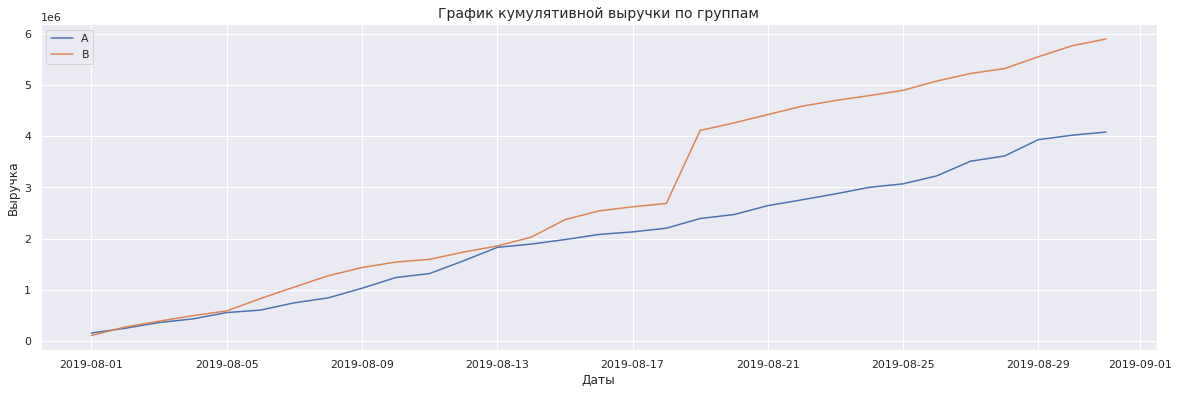

In [22]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]
plt.figure(figsize=(20,6))
# Строим график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A');

# Строим график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B');
plt.title('График кумулятивной выручки по группам', size=14)
plt.xlabel("Даты")
plt.ylabel("Выручка")
plt.legend();

С самого начала теста увеличение выручки сегментов шло равномерно с небольшим перевесом сторону сегмента В до момента резкого скачка выручки сегмента В 2019-08-18.

Вызвано это может быть аномально большие заказами, которые влияют на
результаты.


##2.3. Построим график кумулятивного среднего чека по группам


---



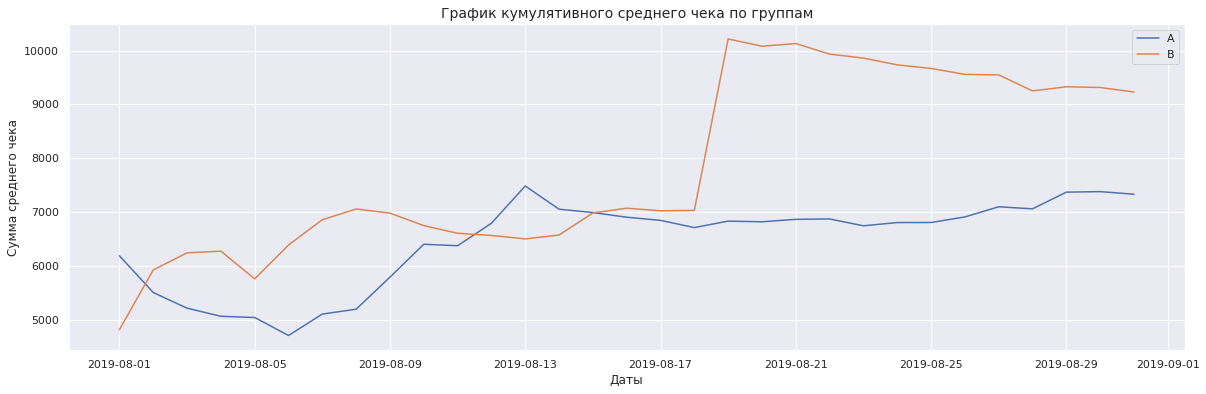

In [23]:
plt.figure(figsize=(20,6))
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A');
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B');
plt.title('График кумулятивного среднего чека по группам', size=14)
plt.xlabel("Даты")
plt.ylabel("Сумма среднего чека")
plt.legend();

Кумулятивное значение среднего чека сегмента В сильно также выросло 2019-08-18 после чего наблюдается небольшое снижение.

Скорее всего, принимать решение по этой метрике рано. Или требуется
дополнительный анализ выбросов, которые так сильно искажают результаты.


##2.4. Построим график относительного изменения кумулятивного среднего чека группы B к группе A


---



Объединим таблицы cumulative_revenue_a и cumulative_revenue_b методом merge() так, чтобы она содержала столбцы: ['date', 'revenueA', 'revenueB', 'ordersA', 'ordersB'].

Сохраним в переменной merged_cumulative_revenue.

Построем график относительно различия кумулятивного среднего чека группы B к группе A.

Добавим пунктирную линию оси X (значение оси Y = 0) методом plt.axhline().

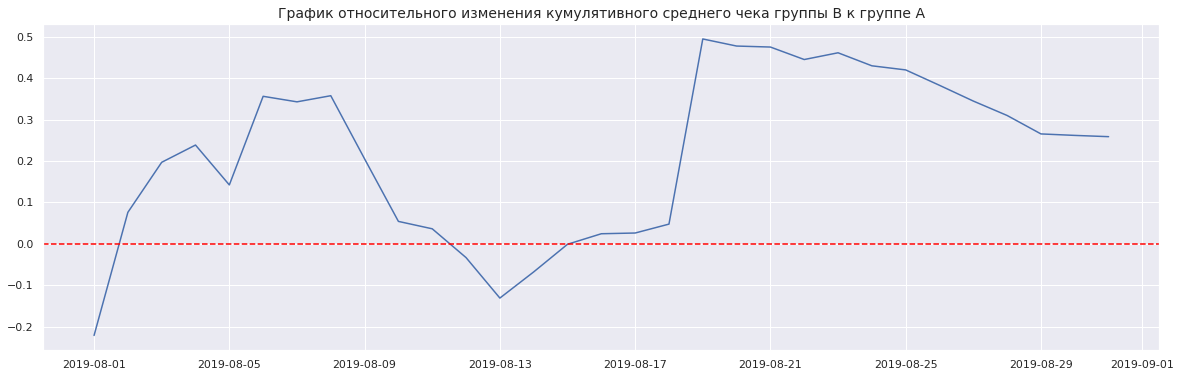

In [24]:
# собираем данные в одном датафрейме
merged_cumulative_revenue = cumulative_revenue_a.merge(cumulative_revenue_b, left_on='date', right_on='date', how='left', suffixes=['_a', '_b'])

# cтроим отношение средних чеков
plt.figure(figsize=(20,6))
plt.plot(merged_cumulative_revenue['date'], (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b'])/(merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a'])-1);
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A', size=14)

# добавляем ось X
plt.axhline(y=0, color='red', linestyle='--');

Результаты теста значительно и резко менялись в несколько дат. Видимо,
именно тогда были совершены аномальные заказы.



##2.5. Построим график кумулятивной конверсии по группам


---



Добавим в cumulative_data столбец 'conversion' c отношением числа заказов к количеству пользователей в указанной группе в указанный день.

Объявим переменные cumulative_data_a и cumulative_data_b, в которых сохраним данные о заказах в сегментах A и B соответственно.

Построим графики кумулятивной конверсии по дням по группам.

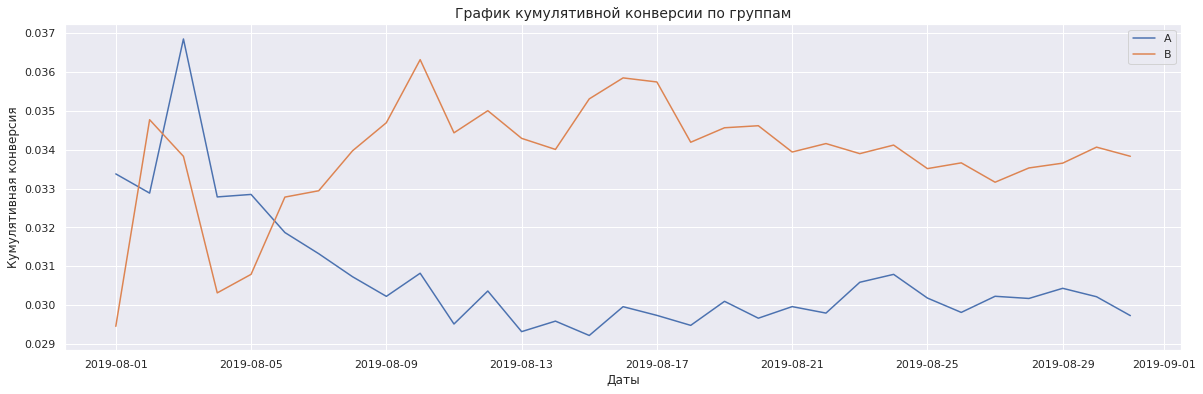

In [25]:
# считаем кумулятивную конверсию
cumulative_data['conversion'] = cumulative_data['orders']/cumulative_data['visitors']

# отделяем данные по группе A
cumulative_data_a = cumulative_data[cumulative_data['group']=='A']

# отделяем данные по группе B
cumulative_data_b = cumulative_data[cumulative_data['group']=='B']

# строим графики
plt.figure(figsize=(20,6))
plt.plot(cumulative_data_a['date'], cumulative_data_a['conversion'], label='A');
plt.plot(cumulative_data_b['date'], cumulative_data_b['conversion'], label='B');
plt.title('График кумулятивной конверсии по группам', size=14)
plt.xlabel("Даты")
plt.ylabel("Кумулятивная конверсия")
plt.legend();

В начале теста сегмент А имел большую конверсию. Далее наблюдались скачки и резкое снижение конверсии по сегменту А, по сегменту В же конверсия стала больше.

К концу теста колебания по конверсии по сегментам составляют значения:
* А - 0,029-0,031
* В - 0,033-0,034


##2.6. Построим график относительного изменения кумулятивной конверсии группы B к группе A


---



Объединим таблицы cumulative_data_a и cumulative_data_b методом merge() так, чтобы она содержала столбцы: ['date', 'conversion_a', 'conversion_b'] и сохраним в переменной merged_cumulative_conversions.

Построим график относительно различия кумулятивной конверсии группы B к группе A и добавим пунктирную линию оси X чёрного цвета ('black') со значением оси Y = 0 методом plt.axhline(). И ещё одну линию оси X серого цвета ('grey') со значением оси Y = 0.15.

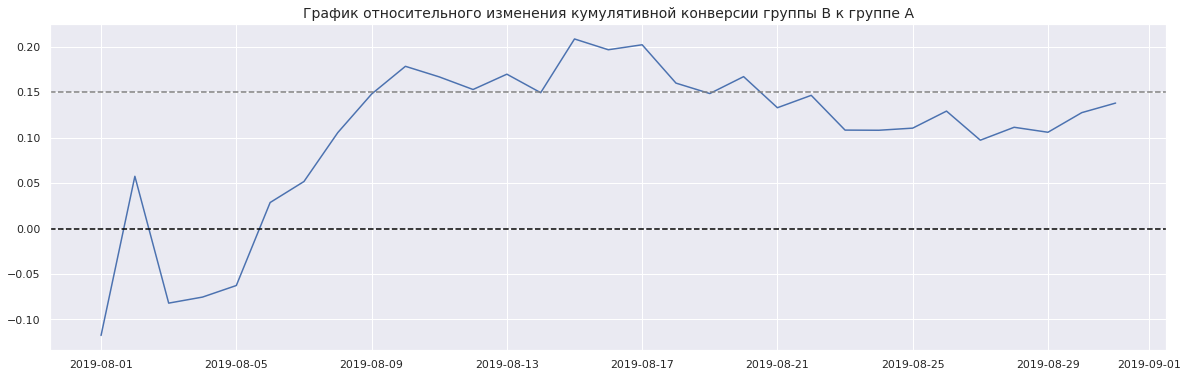

In [26]:
merged_cumulative_conversions = cumulative_data_a[['date','conversion']].merge(cumulative_data_b[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(20,6))
plt.plot(merged_cumulative_conversions['date'], merged_cumulative_conversions['conversionB']/merged_cumulative_conversions['conversionA']-1, label="Относительный прирост конверсии группы B относительно группы A");
plt.title('График относительного изменения кумулятивной конверсии группы B к группе A', size=14)
plt.axhline(y=0, color='black', linestyle='--');
plt.axhline(y=0.15, color='grey', linestyle='--');

Почти с самого начала теста группа В лидирует по конверсии: становится
лучше и лучше, либо зафиксировалась около прироста в 15 % относительно
группы А, но количество дней теста небольшое.


##2.7. Построим точечный график количества заказов по пользователям


---



      visitor_id  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


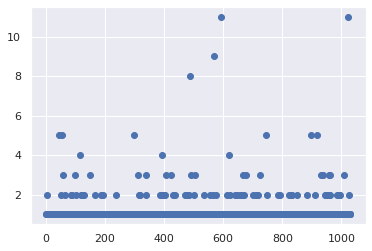

In [27]:
orders_per_user = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitor_id', as_index=False).agg({'transaction_id' : pd.Series.nunique})
orders_per_user.columns = ['visitor_id','orders']

print(orders_per_user.sort_values(by='orders',ascending=False).head(10))

x_values = pd.Series(range(0,len(orders_per_user)))
plt.scatter(x_values, orders_per_user['orders']);

Пользователей, заказавших более двух раз, совсем мало. Они вполне могут
быть аномальными.


##2.8. Посчитаем 95-й и 99-й перцентили количества заказов на пользователя

---



In [28]:
print(np.percentile(orders_per_user['orders'], [90, 95, 99]))

[1. 2. 4.]


Не более 5% пользователей совершали больше двух заказов. И не более 1%
пользователей — больше четырёх заказов. Все, что за 99 перцентилем — аномально.


##2.9. Построим точечный график стоимостей заказов

---



      transaction_id  visitor_id       date  revenue group
425        590470918  1920142716 2019-08-19  1294500     B
1196      3936777065  2108080724 2019-08-15   202740     B
858        192721366  1316129916 2019-08-27    93940     A
1136       666610489  1307669133 2019-08-13    92550     A
744       3668308183   888512513 2019-08-27    86620     B
682       1216533772  4266935830 2019-08-29    78990     B
662       1811671147  4266935830 2019-08-29    78990     A
743       3603576309  4133034833 2019-08-09    67990     A
1103      1348774318  1164614297 2019-08-12    66350     A
1099       316924019   148427295 2019-08-12    65710     A


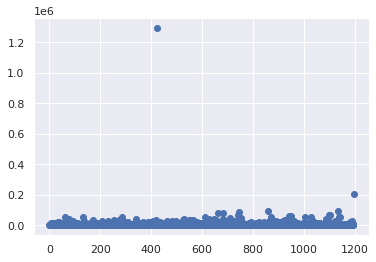

In [29]:
print(orders.sort_values(by='revenue',ascending=False).head(10))

x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']) ;
# plt.ylim(0, 100000)

Видны 2 явных выброса.


##2.10. Посчитаем 95-й и 99-й перцентили стоимости заказов

---



In [30]:
print(np.percentile(orders['revenue'], [90, 95, 99])) 

[18168.  28000.  58233.2]


Не более 5 % заказов на сумму 28000, не более 1 % - 58233.2. Все, что за 95 перцентилем — аномально.


##2.11. Посчитаем статистическую значимость различий в конверсии между группами по «сырым» данным

---



In [31]:
conversion = (orders.groupby('group').agg({'transaction_id':'count'}).rename(columns={'transaction_id':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']
conversion

,group,orders,visitors,conversion
0,A,557,18736,0.029729
1,B,640,18916,0.033834


Воспользуемся Z-критерием для разности двух долей.

H0: Конверсия в группе A равна конверсии в группе B

H1: Конверсия в группе A НЕ равна конверсии в группе B

In [32]:
alpha=0.05
purchases = np.array(conversion['orders'])
leads = np.array(conversion['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.02320723394441848
Отвергаем нулевую гипотезу


Анализ «сырых» данных сообщает, что в конверсии между группами есть
статистически значимые различия.


##2.12. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным


---



Воспользуемся критерием Манна-Уитни

H0: Средний чек A равен среднему чеку группы B

H1: Средний чек A НЕ равен среднему чеку группы B

In [33]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.3646454927716229
Не получилось отвергнуть H0: вывод о различии сделать нельзя


Анализ «сырых» данных сообщает, что в средних чеках между группами отсутствуют
статистически значимые различия.


##2.13. Посчитаем статистическую значимость различий в конверсии между группами по «очищенным» данным

---



Примем за аномальных пользователей тех, кто совершил 4 заказов и более, или совершил заказ на сумму от 28 000. Так мы уберём 1% пользователей с наибольшим числом заказов и от 1% до 5% заказов с наибольшей стоимостью.

In [34]:
outliers_orders_num = orders_per_user[orders_per_user['orders'] >= 4]['visitor_id'].to_list()

In [35]:
outliers_revenue = orders[orders['revenue'] > 28000]['visitor_id']

In [36]:
orders_clean = orders[~orders['visitor_id'].isin(outliers_orders_num)]
orders_clean = orders[~orders['visitor_id'].isin(outliers_revenue)]

In [37]:
orders_clean

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [38]:
conversion_clear = (orders_clean.groupby('group').agg({'transaction_id':'count'}).rename(columns={'transaction_id':'orders'}))\
                                                .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()

Воспользуемся Z-критерием для разности двух долей.

H0: Конверсия в группе A равна конверсии в группе B

H1: Конверсия в группе A НЕ равна конверсии в группе B

In [39]:
alpha=0.05
purchases = np.array(conversion_clear['orders'])
leads = np.array(conversion_clear['visitors'])
p1 = purchases[0] / leads[0]
p2 = purchases[1] / leads[1]
combined = (purchases[0] + purchases[1]) / (leads[0] + leads[1])
difference = p1-p2
z_value = difference / math.sqrt(combined * (1 - combined) * (1 / leads[0] + 1 / leads[1]))
distr = st.norm(0,1)
p_value = (1 - distr.cdf(abs(z_value))) * 2
print('p-значение: ', p_value)
if (p_value < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение:  0.026772933736510796
Отвергаем нулевую гипотезу


Как и в случае с сырыми данными, статистическая значимость достигнута.
Сегмент В значительно лучше сегмента А.


##2.14. Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным


---



Воспользуемся критерием Манна-Уитни

H0: Средний чек A равен среднему чеку группы B

H1: Средний чек A НЕ равен среднему чеку группы B

In [40]:
alpha = 0.05
results = st.mannwhitneyu(orders_clean[orders_clean['group']=='A']['revenue'], orders_clean[orders_clean['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем H0: разница статистически значима")
else:
    print("Не получилось отвергнуть H0: вывод о различии сделать нельзя")

p-значение:  0.4317364820038618
Не получилось отвергнуть H0: вывод о различии сделать нельзя


Как и в случае с сырыми данными, вывод о различии средних чеков между сегментами сделать нельзя.

**Резюме:** остановить тест, признать его успешным и перейти к проверке следующей гипотезы.